In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [3]:
class Net(nn.Module):

    def __init__(self, Layers):
        super(Net,self).__init__()
        self.hidden = nn.ModuleList() ## 1
        for input_size, output_size in zip(Layers, Layers[1:]): ## 2
            self.hidden.append(nn.Linear(input_size, output_size))

    def forward(self, activation):  ## 为什么这里输入的也是activation??
        L = len(self.hidden)
        for (l, linear_transform) in zip (range (L), self.hidden): ## 3
            if l < L - 1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

In [4]:
def train (data_set, model, criterion, train_loader, optimizer, epochs = 500):
    Loss = []
    Acc = []
    for epoch in range (epochs):
        for x, y in train_loader:  ## 没有定义过 --> done
            optimizer.zero_grad() ## 4 --> done
            yhat = model(x)  ## --> done
            loss = criterion(y,yhat)  ## --> done
            optimizer.zero_grad()  ## --> done
            loss.backward()    ## --> done
            optimizer.step()   ## --> done
            Loss.append(loss.item())  ## loss is torch tensor, use .item() can check the items in the tensor??
        ACC.append(accuracy(model, dataset))   ## --> done

    return Loss

In [46]:
def accuracy (model, data_set):
    _, yhat = torch.max (model(data_set.x), 1)
    return (yhat == data_set.y).numpy().mean()

In [45]:
model = Net(Layers)
criterion = nn.CrossEntropyLoss ()
Loss = 

1. train_loader: 
train_loader = DataLoader(dataset=data_set, batch_size=20)

doc: torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, /n sampler=None, batch_sampler=None, num_workers=0, collate_fn=None, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None, multiprocessing_context=None, generator=None)


In [42]:
train_loader = DataLoader(dataset=data_set, batch_size =1)
# for x, y in train_loader:
#     print ("x is ", x, "y is ", y)
# Data loader. Combines a dataset and a sampler, and provides an iterable over the given dataset.
# 把以前的数据集整理成一个可以迭代的数据集
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [43]:
class Data (Dataset):

    def __init__(self, K = 3, N = 500):
        D = 2
        X = np.zeros ((N*K, D))  # X.shape = (1500,2), each row = single example
        y = np.zeros (N*K)   ## y.shape = (1500 ,1), lable, each row = single example
        for j in range(K):  ## 这个for loop不重要
            ix = range(N * j, N * (j + 1))
            r = np.linspace(0.0, 1, N) # radius
            t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
            X[ix] = np.c_[r * np.sin(t), r*np.cos(t)]
            y[ix] = j

        ## transform numpy array to torch tensor
        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)  # 注意这里的x是小写
        self.len = y.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

    def plot_stuff(self):  ## 不重要
        plt.plot(self.x[self.y[:] == 0, 0].numpy(), self.x[self.y[:] == 0, 1].numpy(), 'o', label="y = 0")
        plt.plot(self.x[self.y[:] == 1, 0].numpy(), self.x[self.y[:] == 1, 1].numpy(), 'ro', label="y = 1")
        plt.plot(self.x[self.y[:] == 2, 0].numpy(), self.x[self.y[:] == 2, 1].numpy(), 'go', label="y = 2")
        plt.legend()
        plt.show()

### 研究一下这个class data

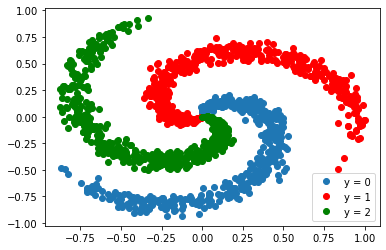

In [44]:
data_set = Data()
data_set.plot_stuff()
data_set.y = data_set.y.view(-1)


## DataLoader

# 实验和注释

In [7]:
Layers = [1, 16, 16, 16, 1]
model = Net(Layers)
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [5]:
###------------注释2 ----------###
Layers = [1,2,3,4]
Layers[1:]
for input_size, output_size in zip(Layers, Layers[1:]):
    print ("input is ", input_size)
    print ("output is ", output_size)
###------------等价于----------###
i = 1
for a, b in zip([1,2,3,4], [2,3,4]):
    print (a)
    print (b)
    print ("iteration times", i)
    i+= 1
###------------b 和 a 的长度不同?? ----------###
###------------当长度短的被遍历了之后, 循环就自动停止了----------###
i = 1
for a, b in zip([1,2,3,4], [3,4]):
    print (a)
    print (b)
    print ("iteration times", i)
    i+= 1

input is  1
output is  2
input is  2
output is  3
input is  3
output is  4
1
2
iteration times 1
2
3
iteration times 2
3
4
iteration times 3
1
3
iteration times 1
2
4
iteration times 2


<img src="./figure/IMG_285A7875441A-1.jpeg" width = "600" alt="图片名称" align=center />

<img src="./figure/IMG_66D53FC12F91-1.jpeg" width = "600" alt="图片名称" align=center />

In [6]:
###------------comment 3 ----------###
Layers = [1,2,3]
hidden = nn.ModuleList()
i = 1
for input_size, output_size in zip(Layers, Layers[1:]):
    hidden.append(nn.Linear(input_size, output_size))
    print ("iteration", i, ": \n", list(hidden.parameters()))
    i+= 1 

###------------step 1 ----------###
# Linear (1,2)
# generate 2 random parameters: w = (2,1), b = (1,2)
###------------step 2 ----------###
# Linear (2,3)
# generate 2 random parameter: w = (3,2), b = (1,3)

L = len(hidden)
for (l, linear_transform) in zip (range (L), hidden):
    print (linear_transform)

hidden[1]
## hiddent is a list of Linear function

iteration 1 : 
 [Parameter containing:
tensor([[-0.1962],
        [ 0.5896]], requires_grad=True), Parameter containing:
tensor([-0.2235, -0.1074], requires_grad=True)]
iteration 2 : 
 [Parameter containing:
tensor([[-0.1962],
        [ 0.5896]], requires_grad=True), Parameter containing:
tensor([-0.2235, -0.1074], requires_grad=True), Parameter containing:
tensor([[ 0.0923, -0.3940],
        [ 0.4916,  0.0887],
        [-0.5667, -0.5249]], requires_grad=True), Parameter containing:
tensor([ 0.6922, -0.3882, -0.0663], requires_grad=True)]
Linear(in_features=1, out_features=2, bias=True)
Linear(in_features=2, out_features=3, bias=True)


Linear(in_features=2, out_features=3, bias=True)